<a href="https://colab.research.google.com/github/Sun-cs-Sol/LC_CD/blob/main/LH_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Começando o projeto com a EDA, a análise exploratória de dados. A partir disso, vamos poder entender nossa base e ver como os dados estão distribuídos.

In [136]:
#importando bibliotecas necessárias para a exploração
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re


In [137]:
#Abrir a base de dados
df = pd.read_csv("/content/desafio_indicium_imdb.csv")


In [138]:
# Entender a estrutura da database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [139]:
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [140]:
df.nunique()

,0
Unnamed: 0,999
Series_Title,998
Released_Year,100
Certificate,16
Runtime,140
Genre,202
IMDB_Rating,16
Overview,999
Meta_score,63
Director,548


In [141]:
print(df.dtypes)


Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [142]:
df["Certificate"].value_counts()

,count
Certificate,
U,234
A,196
UA,175
R,146
PG-13,43
PG,37
Passed,34
G,12
Approved,11


Ao explorar a base de dados, podemos perceber que:
- A coluna Unnamed não agreda à base de dados
- A tipificação das colunas não está adequada
- Existem valores nulos nas colunas: Certificate, Meta_score, Gross.
- Os tipos de classificação dos filmes está variado


Para fazer essas moficiações, vou trabalhar com uma nova tabela, para manter a original intacta e poder explorar usando uam copia dela.

In [143]:
df_novo = df.copy()


In [144]:
#Transformar os anos dos filmes em numéricos.
df_novo['Released_Year'] = pd.to_numeric(df_novo['Released_Year'], errors='coerce')


In [145]:
#Remover as virgulas da coluna de faturamento e tranformar de object para numérico
df_novo['Gross'] = df_novo['Gross'].str.replace(',', '', regex=True)
df_novo['Gross'] = pd.to_numeric(df_novo['Gross'])

In [146]:
#Remover o "min" dos dados do tempo de filme e transformar em numérico
df_novo['Runtime'] = df_novo['Runtime'].str.replace(' min', '', regex=True)
df_novo['Runtime'] = pd.to_numeric(df_novo['Runtime'])

In [147]:
#Os dados da coluna Gross e Meta_score são importante e para evitar perder as informações nas linhas com valores nulos, vou optar por substituir os valores nulos pela média da coluna
df_novo['Gross'].fillna(df_novo['Gross'].mean(), inplace=True)
df_novo['Meta_score'].fillna(df_novo['Meta_score'].mean(), inplace=True)

/tmp/ipython-input-3214546444.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_novo['Gross'].fillna(df_novo['Gross'].mean(), inplace=True)
/tmp/ipython-input-3214546444.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [148]:
#Na coluna Certificate vamos substituir os valores nulos por Unrated
df_novo['Certificate'].fillna('Unrated', inplace=True)


/tmp/ipython-input-2334073304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_novo['Certificate'].fillna('Unrated', inplace=True)


In [149]:
#Para essa análise vamos excluir as colunas 'Star1', 'Star2', 'Star3', 'Star4', 'Unnamed: 0', elas não vão ser úteis na nossa análise
colunas_para_remover = ['Star1', 'Star2', 'Star3', 'Star4', 'Unnamed: 0']
df_novo = df_novo.drop(columns=colunas_para_remover)

In [150]:
print(df_novo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   No_of_Votes    999 non-null    int64  
 10  Gross          999 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 86.0+ KB
None


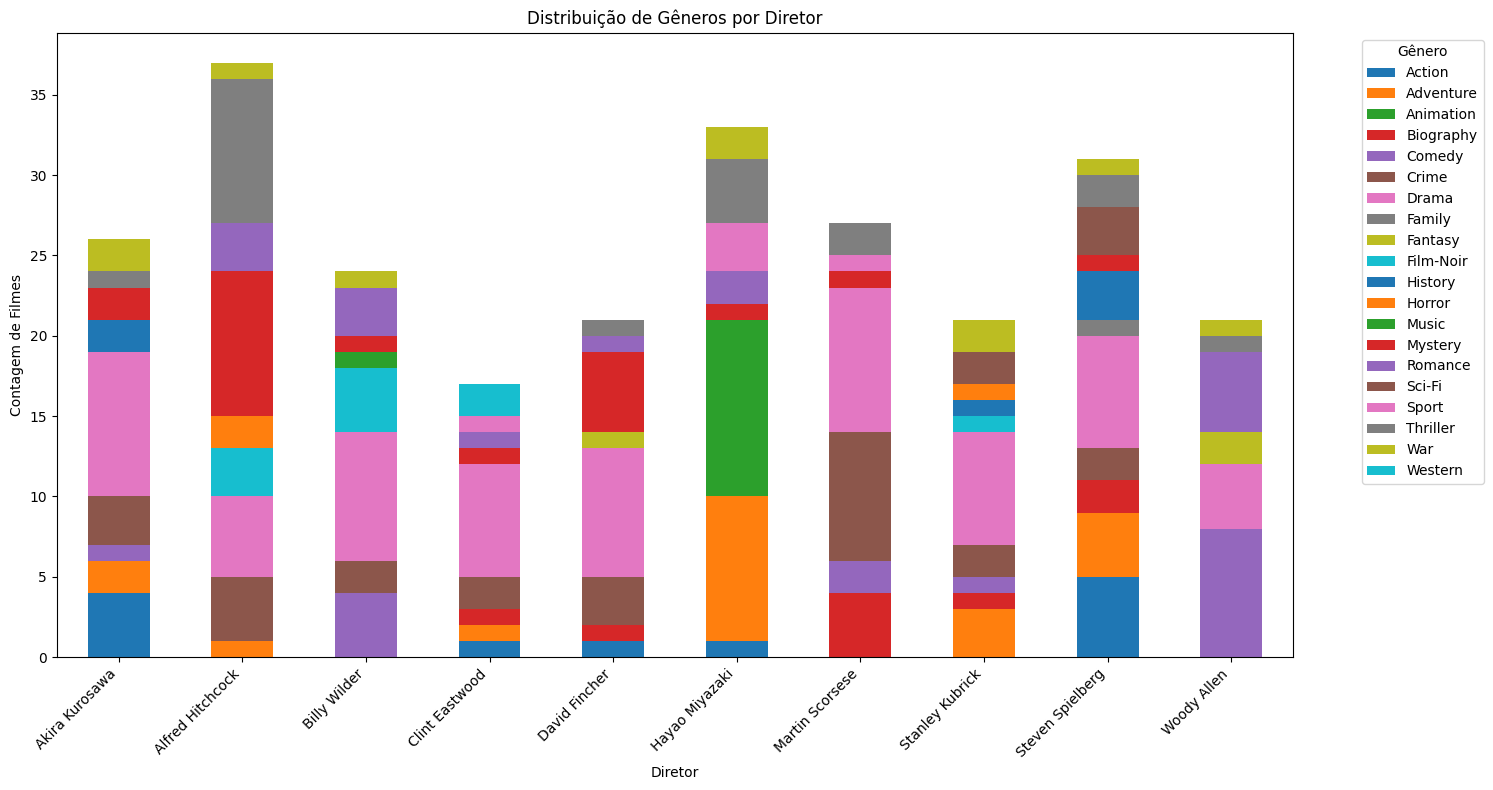

In [151]:
#Os gêneros mais produzidos pelos diretores mais frequantes
top_diretores = df_novo['Director'].value_counts().nlargest(10).index
df_top_diretores = df_novo[df_novo['Director'].isin(top_diretores)]

df_generos = df_novo.assign(Genre=df_novo['Genre'].str.split(', ')).explode('Genre')
top_10_diretores = df_top_diretores['Director'].value_counts().nlargest(10).index

contagem_generos_por_diretor = df_generos[df_generos['Director'].isin(top_10_diretores)].groupby('Director')['Genre'].value_counts().unstack(fill_value=0)

contagem_generos_por_diretor.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('Distribuição de Gêneros por Diretor')
plt.xlabel('Diretor')
plt.ylabel('Contagem de Filmes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

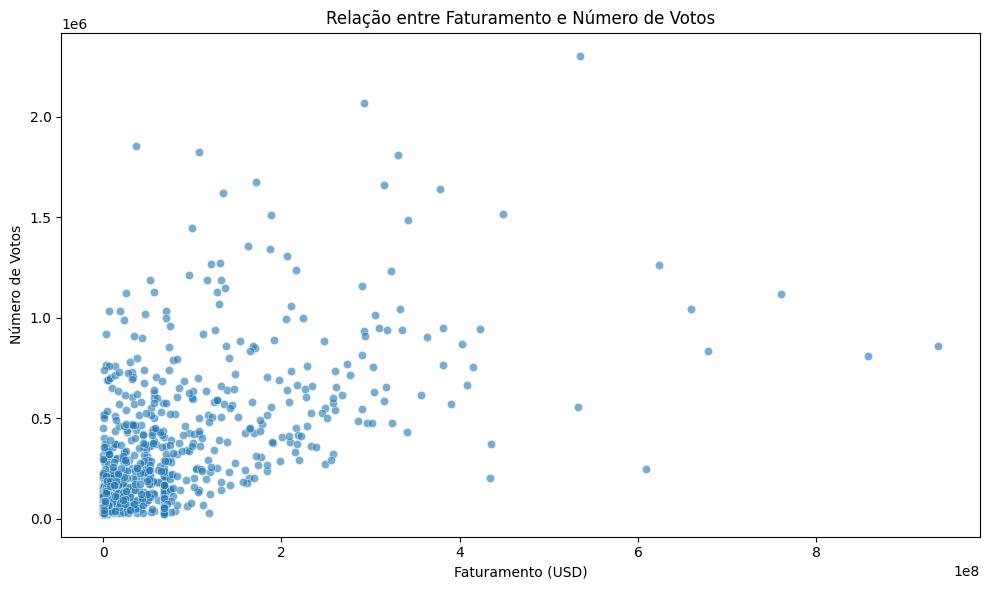

In [152]:
#Explorar a relação entre o faturamento dos filmes com a quantidade de votos que eles receberam
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_novo['Gross'], y=df_novo['No_of_Votes'], alpha=0.6)
plt.title('Relação entre Faturamento e Número de Votos')
plt.xlabel('Faturamento (USD)')
plt.ylabel('Número de Votos')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3182977225.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_medio_por_genero.values, y=faturamento_medio_por_genero.index, palette='plasma')


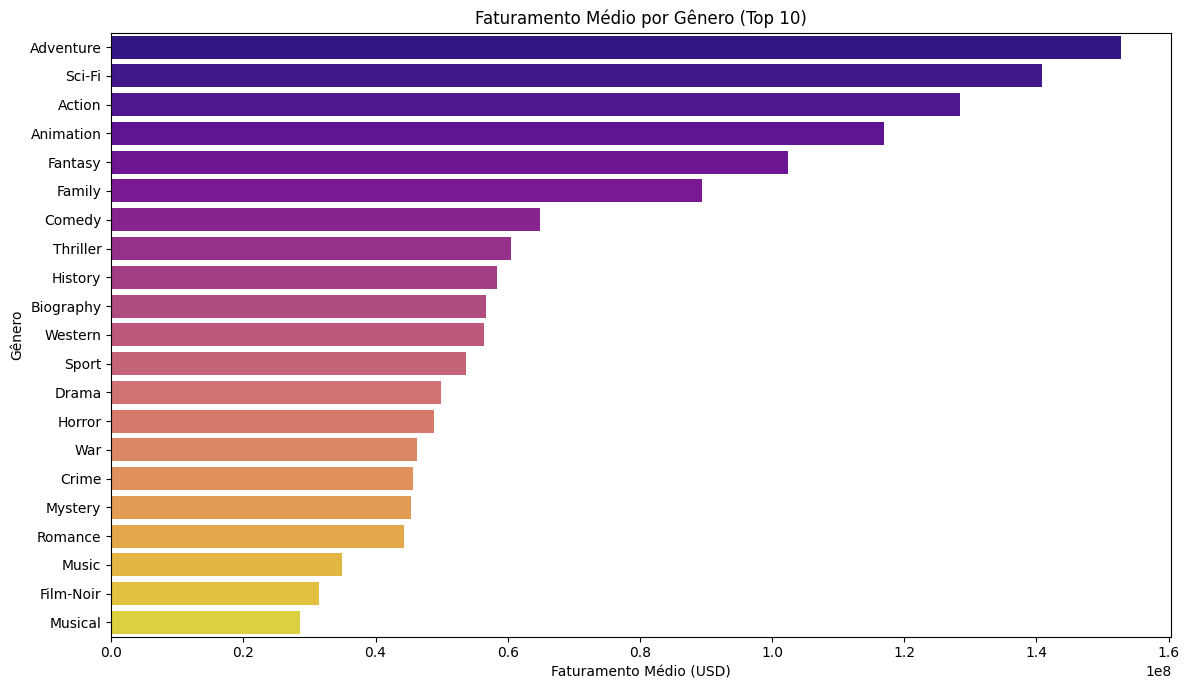

In [153]:
#Alguns gêneros conseguem alcançar um faturamento mais alto, seja por terem mais filmes desse tipo ou pela preferêcia do público
df_generos = df_novo.assign(Genre=df_novo['Genre'].str.split(', ')).explode('Genre')

faturamento_medio_por_genero = df_generos.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=faturamento_medio_por_genero.values, y=faturamento_medio_por_genero.index, palette='plasma')
plt.title('Faturamento Médio por Gênero (Top 10)')
plt.xlabel('Faturamento Médio (USD)')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1616991926.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_generos.values, y=contagem_generos.index, palette='viridis')


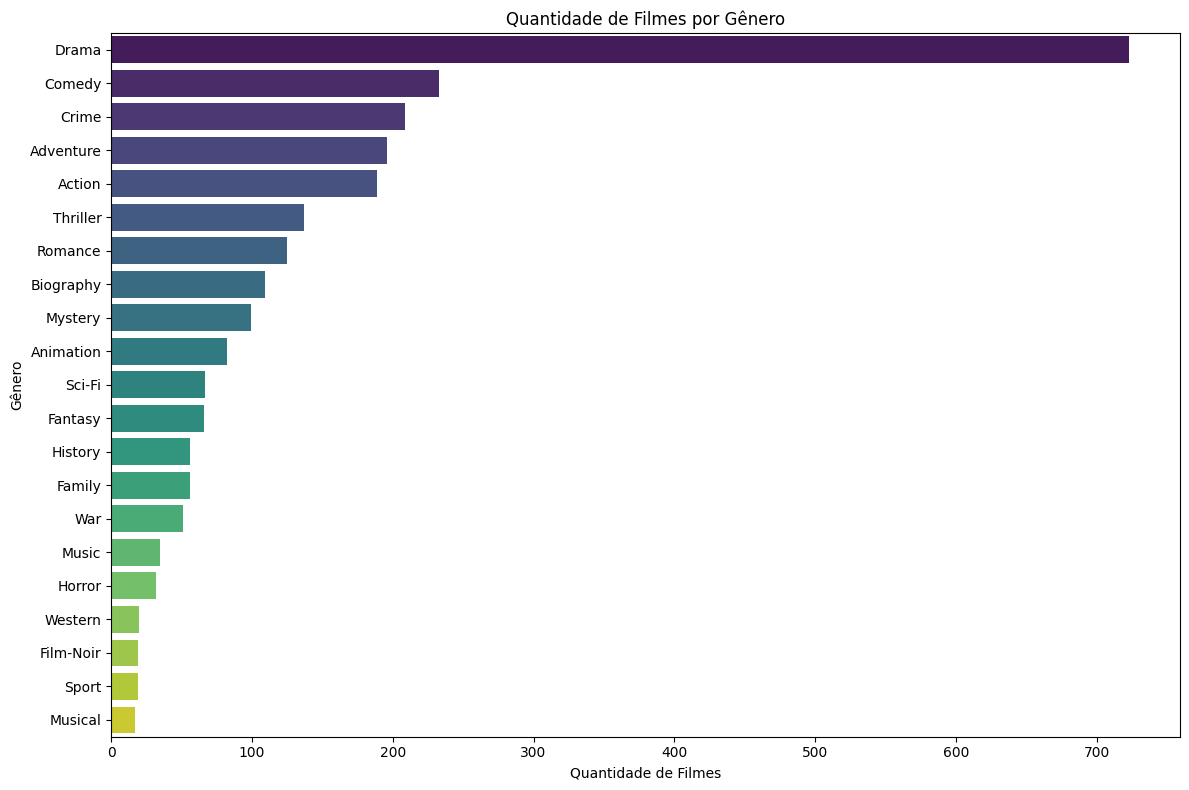

In [154]:
#Podemos notar que o faturamento não está totalmente ligado ao gênero do filme
df_generos = df_novo.assign(Genre=df_novo['Genre'].str.split(', ')).explode('Genre')
contagem_generos = df_generos['Genre'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=contagem_generos.values, y=contagem_generos.index, palette='viridis')

plt.title('Quantidade de Filmes por Gênero')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Gênero')
plt.tight_layout()

plt.show()

/tmp/ipython-input-2787503841.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_medio_por_diretor.values, y=faturamento_medio_por_diretor.index, palette='magma')


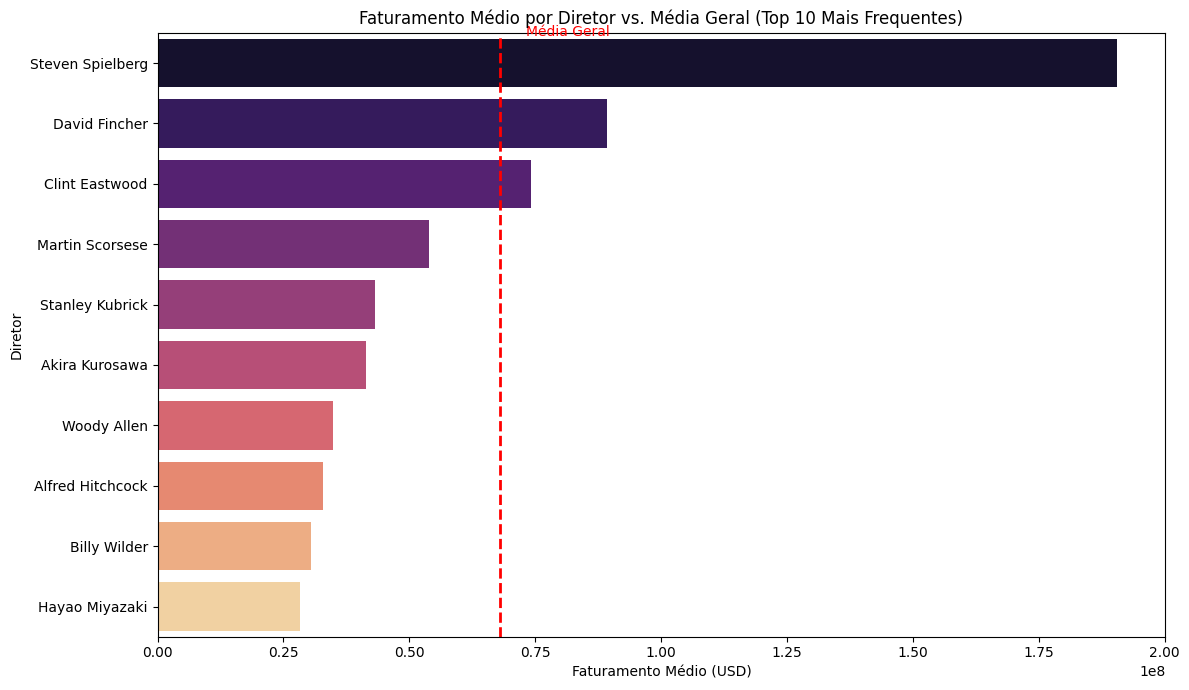

In [155]:
#Analisando se os diretores mais frequentes possuem médias de faturamento acima da média
faturamento_medio_geral = df_novo['Gross'].mean()

top_diretores = df_novo['Director'].value_counts().nlargest(10).index
df_top_diretores = df_novo[df_novo['Director'].isin(top_diretores)]

faturamento_medio_por_diretor = df_top_diretores.groupby('Director')['Gross'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=faturamento_medio_por_diretor.values, y=faturamento_medio_por_diretor.index, palette='magma')

plt.axvline(faturamento_medio_geral, color='red', linestyle='--', linewidth=2)
plt.text(faturamento_medio_geral + 5e6, plt.ylim()[1] * 0.9, 'Média Geral', color='red')

plt.title('Faturamento Médio por Diretor vs. Média Geral (Top 10 Mais Frequentes)')
plt.xlabel('Faturamento Médio (USD)')
plt.ylabel('Diretor')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3822952379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_imdb_por_diretor.values, y=media_imdb_por_diretor.index, palette='viridis')


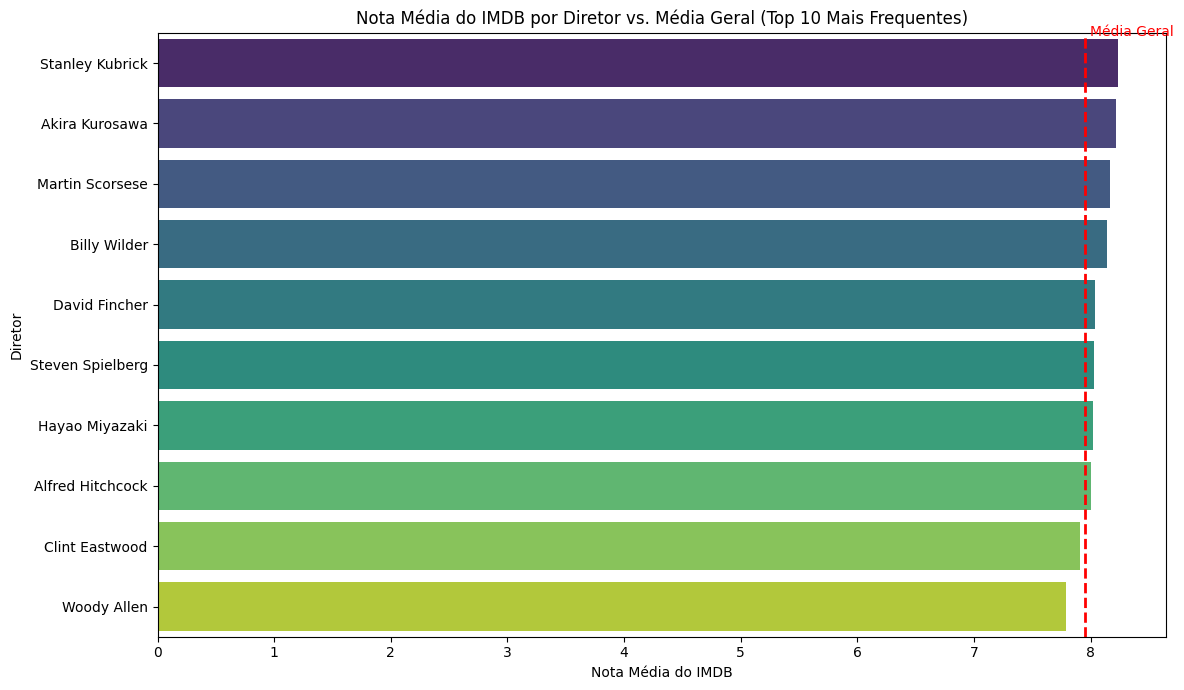

In [156]:
#Analisando se as notas por diretor mais frequente estão acima da média
media_geral_imdb = df_novo['IMDB_Rating'].mean()

top_diretores = df_novo['Director'].value_counts().nlargest(10).index
df_top_diretores = df_novo[df_novo['Director'].isin(top_diretores)]

media_imdb_por_diretor = df_top_diretores.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=media_imdb_por_diretor.values, y=media_imdb_por_diretor.index, palette='viridis')

plt.axvline(media_geral_imdb, color='red', linestyle='--', linewidth=2)
plt.text(media_geral_imdb + 0.05, plt.ylim()[1] * 0.9, 'Média Geral', color='red')

plt.title('Nota Média do IMDB por Diretor vs. Média Geral (Top 10 Mais Frequentes)')
plt.xlabel('Nota Média do IMDB')
plt.ylabel('Diretor')
plt.tight_layout()
plt.show()

A etapa de Análise Exploratória de Dados (EDA) focou no pré-processamento e na formulação de hipóteses.

Para garantir a integridade dos dados, realizei a manipulação em uma cópia do conjunto de dados, denominada df_novo. Os valores nulos foram substituídos de forma estratégica para evitar a perda de informações. Além disso, as colunas Star1, Star2, Star3, Star4 e Unnamed foram excluídas, visando simplificar a análise.

Com base nas observações iniciais, foram formuladas as seguintes hipóteses:

* Diretores com maior frequência de filmes no dataset estão

* relacionados a filmes com notas médias altas.

* Os mesmos diretores frequentes também tendem a ter faturamentos médios acima da média geral.

* Alguns gêneros de filmes são mais bem recebidos pelo público, o que se reflete em notas mais altas.

* Existe uma correlação positiva entre o número de votos de um filme e seu faturamento, sugerindo que a popularidade impulsiona o sucesso comercial.

## Respondendo as perguntas

# Qual filme você recomendaria para uma pessoa que você não conhece?

Por não conhecer a pessoa e não ter indicativo de suas preferências, eu optaria por indicar para ela filmes que foram amplamente assitidos e que ainda sim mantiveram boas avaliações. Assim mostra que foram bem recebidos pela crítica e obtiveram grande sucesso.

Para isso vamos separar os filmes que tiveram notas altas dentre os mais avaliados no IMDB.




In [157]:
quartil_votos = df_novo['No_of_Votes'].quantile(0.75)

melhores_filmes = df_novo[
    (df_novo['IMDB_Rating'] >= 8.0) &
    (df_novo['No_of_Votes'] >= quartil_votos)
].sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False])

print("Top 5 Filmes recomendados para uma pessoa que você não conhece:")
print(melhores_filmes[['Series_Title', 'IMDB_Rating', 'No_of_Votes']].head())

Top 5 Filmes recomendados para uma pessoa que você não conhece:
             Series_Title  IMDB_Rating  No_of_Votes
0           The Godfather          9.2      1620367
1         The Dark Knight          9.0      2303232
2  The Godfather: Part II          9.0      1129952
3            12 Angry Men          9.0       689845
5            Pulp Fiction          8.9      1826188


## Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Com base nos gráficos, as principais conclusões são:

Número de Votos: Existe uma forte correlação entre o faturamento e o número de votos. Isso significa que filmes com alta popularidade, medidos por votos, tendem a ter um faturamento mais alto.

Gênero: A análise de faturamento médio por gênero mostra que os gêneros de Ação, Aventura e Ficção Científica tendem a gerar faturamentos médios superiores, o que os torna fatores importantes.

Frequencia do Diretor: A comparação do faturamento médio por diretor com a média geral mostrou que diretores mais frequentes tendem a ter faturamentos médios acima da média, o que sugere que a reputação do diretor também é um fator de sucesso.

## Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

a) Podemos tirar alguns insights como:
- Quais as palavras mais frenquantes nos filmes com maior faturamento
- Quais as palavras mais comuns dentre os gêneros
-Quais palavras mais comuns nos filmes com as maiores notas de IBMD

E usando essas palavras e as descrições dos filmes, podemos treinar um modelo para que ele identifique a combinação de palavras melhor aceita pelo público para que ele classifque qual a possível nota do filme no imdb.


b) Sim, é possível, podemos treinar um modelo para entender quais as palavras e as combinações delas são mais comuns por gênero para que ela avalie o genero.

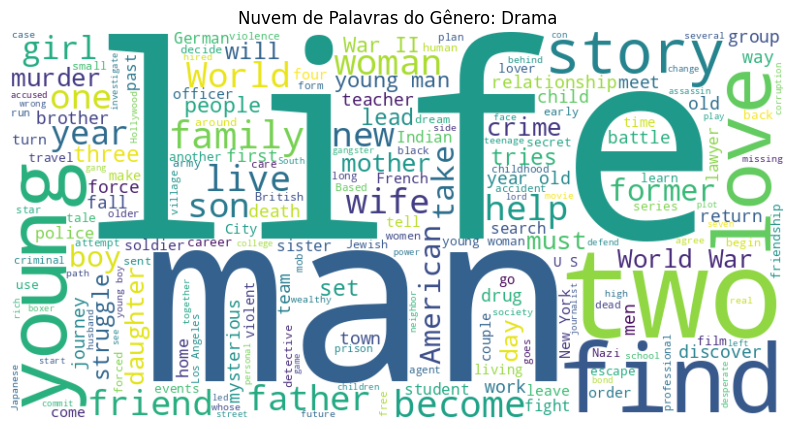


 As palavras mais frequentes para o gênero Drama:
'young': 99
'man': 91
'life': 87
'two': 73
'world': 58
'story': 57
'war': 54
'woman': 53
'new': 49
'him': 48


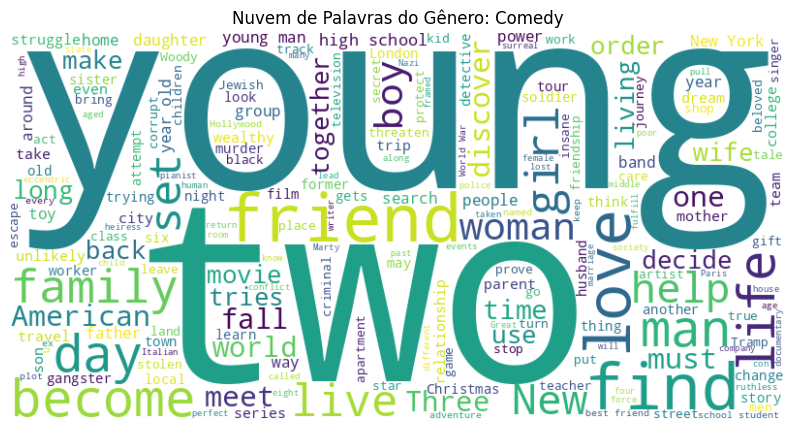


 As palavras mais frequentes para o gênero Comedy:
'young': 35
'two': 28
'man': 23
'new': 20
'love': 19
'friends': 19
'life': 19
'while': 18
'out': 18
'family': 15


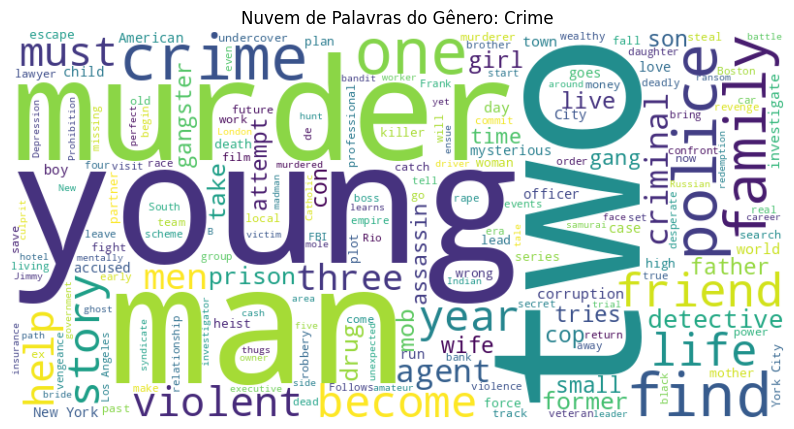


 As palavras mais frequentes para o gênero Crime:
'two': 29
'young': 25
'man': 22
'crime': 20
'one': 20
'murder': 20
'police': 19
'him': 18
'family': 16
'them': 16


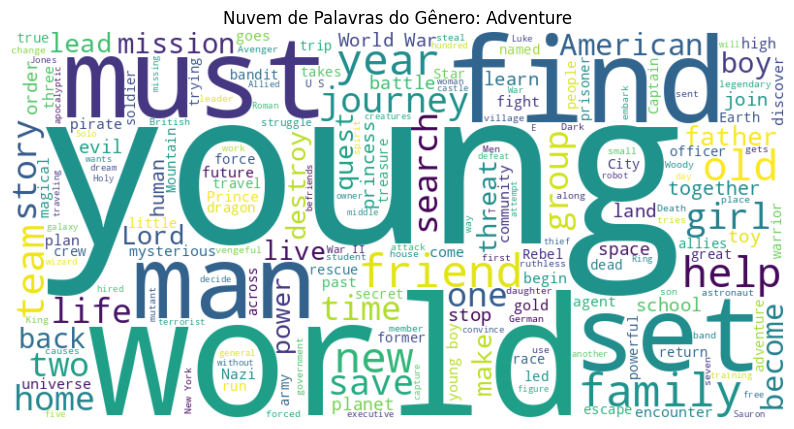


 As palavras mais frequentes para o gênero Adventure:
'young': 30
'world': 29
'must': 19
'new': 18
'find': 15
'out': 14
'while': 14
'war': 14
'man': 13
'against': 12


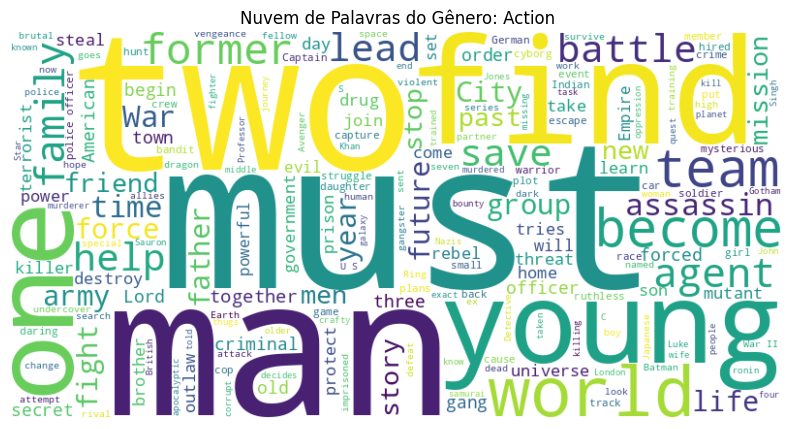


 As palavras mais frequentes para o gênero Action:
'must': 22
'two': 19
'young': 19
'against': 16
'while': 16
'one': 15
'them': 15
'world': 14
'man': 14
'war': 13


In [158]:
#Nesse codigo, estou seprando as palavras mais frequentes dos 5 gêneros com maior quantidade de filmes, removendo algumas palavras mais comuns que devem aparcer com frenquancia mas não representam nem um tipo de informação valiosa para a análise.
df_generos = df_novo.assign(Genre=df_novo['Genre'].str.split(', ')).explode('Genre')
generos_comuns = df_generos['Genre'].value_counts().nlargest(5).index

stopwords = set([
    'a', 'an', 'the', 'and', 'but', 'is', 'in', 'it', 'its', 'to', 'of', 'for', 'with', 'on',
    'as', 'by', 'at', 'from', 'or', 'he', 'she', 'his', 'her', 'their', 'they', 'who', 'what',
    'which', 'where', 'when', 'how', 'about', 'just', 'all', 'into', 'be', 'are', 'i', 's', 'can',
    'over', 'through', 'that', 'this', 'after', 'been', 'before'
])

for genero in generos_comuns:
    df_filtrado = df_generos[df_generos['Genre'] == genero]
    texto_genero = " ".join(review for review in df_filtrado['Overview'])

    texto_processado = texto_genero.lower()
    texto_processado = re.sub(r'[^\w\s]', '', texto_processado)

    palavras = [palavra for palavra in texto_processado.split() if palavra not in stopwords and len(palavra) > 2]
    contagem_palavras = Counter(palavras)
    lista_frequencia = contagem_palavras.most_common(10)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_genero)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvem de Palavras do Gênero: {genero}")
    plt.show()

    print(f"\n As palavras mais frequentes para o gênero {genero}:")
    for palavra, contagem in lista_frequencia:
        print(f"'{palavra}': {contagem}")

## Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

O tipo de problema que estamos resolvendo é de regressão, pois o objetivo é prever a nota do IMDB, que é um valor numérico contínuo. Um problema de classificação, por outro lado, classificaria os filmes em categorias, como bom ou ruim.

Para a modelagem, eu utilizaria as seguintes variáveis:

No_of_Votes: Um grande número de votos indica a popularidade do filme.

Gross: O faturamento também pode estar ligado à popularidade e ao sucesso do filme.

Meta_score: A nota da crítica é um bom indicativo da qualidade do filme.

Eu também usaria a coluna Overview para extrair características importantes do texto.

Para escolher o melhor modelo, eu compararia o desempenho de dois modelos de regressão:

Gradient Boosting: É um modelo poderoso que costuma entregar resultados muito precisos. No entanto, é mais suscetível a overfitting se não for configurado corretamente.

Random Forest: É um modelo robusto, que lida bem com a variabilidade dos dados. Por outro lado, sua interpretabilidade é menor do que a de modelos mais simples.

Ao usar ambos, posso comparar suas performances. O Random Forest serve como uma excelente base de comparação devido à sua robustez, enquanto o Gradient Boosting oferece a possibilidade de alcançar a melhor precisão possível na previsão.

A métrica de desempenho que eu escolheria para avaliar o modelo é o RMSE (Root Mean Squared Error). Essa medida é ideal para regressão, pois ela penaliza mais os erros maiores, o que é essencial para garantir que as previsões do modelo não se desviem muito da nota real do filme.


In [159]:
#preparando os valores para que eles possam servir de parametros para os modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


features_numericas = ['No_of_Votes', 'Gross', 'Meta_score']
features_categoricas = ['Genre', 'Director']

X = df_novo[features_numericas + features_categoricas]
y = df_novo['IMDB_Rating']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), features_categoricas)
    ])

X_transformado = preprocessor.fit_transform(X)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_transformado, y, test_size=0.2, random_state=42)

In [160]:
#Utilizando o modelo Random forest, o Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_treino, y_treino)

y_pred_rf = modelo_rf.predict(X_teste)

rmse_rf = np.sqrt(mean_squared_error(y_teste, y_pred_rf))
r2_rf = r2_score(y_teste, y_pred_rf)

print(f"Random Forest - RMSE: {rmse_rf:.4f}")
print(f"Random Forest - R-squared: {r2_rf:.4f}")

Random Forest - RMSE: 0.2147
Random Forest - R-squared: 0.2979


In [161]:
#Utilizado o Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

modelo_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
modelo_gb.fit(X_treino, y_treino)

y_pred_gb = modelo_gb.predict(X_teste)

rmse_gb = np.sqrt(mean_squared_error(y_teste, y_pred_gb))
r2_gb = r2_score(y_teste, y_pred_gb)

print(f"Gradient Boosting - RMSE: {rmse_gb:.4f}")
print(f"Gradient Boosting - R-squared: {r2_gb:.4f}")

Gradient Boosting - RMSE: 0.2083
Gradient Boosting - R-squared: 0.3390


In [162]:
#Aqui tento prever o possíbel IMDB do filme. Os modelos ainda podem ser melhorados para atingirem um valor mais próximo da realidade, mas usando as features utilizadas já é um bom começo para a predição.
dados_para_prever = pd.DataFrame([{
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}])

dados_para_prever['Gross'] = pd.to_numeric(dados_para_prever['Gross'].str.replace(',', '', regex=True))
dados_para_prever['Runtime'] = pd.to_numeric(dados_para_prever['Runtime'].str.replace(' min', '', regex=True))
dados_para_prever['Released_Year'] = pd.to_numeric(dados_para_prever['Released_Year'])

features_numericas = ['No_of_Votes', 'Gross', 'Meta_score', 'Runtime']
features_categoricas = ['Genre', 'Director']
X_novo = dados_para_prever[features_numericas + features_categoricas]

X_novo_transformado = preprocessor.transform(X_novo)

previsao_rf = modelo_rf.predict(X_novo_transformado)

previsao_gb = modelo_gb.predict(X_novo_transformado)

print(f"Previsão Random Forest: {previsao_rf[0]:.2f}")
print(f"Previsão Gradient Boosting: {previsao_gb[0]:.2f}")

Previsão Random Forest: 8.78
Previsão Gradient Boosting: 8.68


Para a finzalização e modelagem do projeto, com os dados limpos e minhas hipóteses validadas, passei para a modelagem preditiva. Defini o problema como de regressão e treinei dois modelos: Random Forest e Gradient Boosting. Comparei o desempenho de ambos usando métricas como RMSE e R-squared para encontrar o mais preciso.

No final, o projeto não só forneceu as respostas para todas as perguntas do desafio, mas também me permitiu criar um modelo inicial funcional para prever a nota de um filme.

In [163]:
!pip freeze > requirements.txt